In [1]:
import os
import numpy as np
import xarray as xr
from itertools import groupby
from toolz import partition
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%cd /N/project/Zli_lab/ERA5_land_data_recalculated
curr_data_path = os.getcwd()

/N/project/Zli_lab/ERA5_land_data_recalculated


In [42]:
## Rx1h

In [5]:
def Rx1h(data):
    nan_mask = np.isnan(data)
    binary_mask = np.where(nan_mask, 0, 1)
    numeric_indices = np.where(binary_mask == 1)[0]
    if len(numeric_indices)>0 and len(numeric_indices)==len(data):
        filtered_data = data[numeric_indices]
        maxima_data = filtered_data.max()
    elif len(numeric_indices)>0 and len(numeric_indices)<len(data):
        nan_indices = np.where(binary_mask == 0)[0]
        data = data.copy()
        data[nan_indices] = 0
        maxima_data = data.max()
    else:
        maxima_data = np.nan
    return maxima_data

In [6]:
ind_arr_MAM = []
for year in range(1979,2024):
    files = []
    for month in range(3,6):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(Rx1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_MAM.append(result_indice.tp.values)
    print(year)

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [7]:
ind_arr_JJA = []
for year in range(1979,2024):
    files = []
    for month in range(6,9):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(Rx1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_JJA.append(result_indice.tp.values)
    print(year)

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [8]:
ind_arr_SON = []
for year in range(1979,2024):
    files = []
    for month in range(9,12):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    if 'expver' in ds.dims:
            # Remove the 'expver' dimension using isel
            ds = ds.sel(expver=1).combine_first(ds.sel(expver=5))
    ds = ds.chunk(dict(time=-1))
    
    result_indice = xr.apply_ufunc(Rx1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_SON.append(result_indice.tp.values)
    print(year)

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [9]:
ind_arr_DJF = []
for year in range(1979,2024):
    files = []
    files.append(f"Hourly_Total_Precipitation_T_12{year-1}.nc")
    for month in range(1,3):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(Rx1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_DJF.append(result_indice.tp.values)
    print(year)

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [10]:
season_list = ['DJF','MAM','JJA','SON']
season = xr.DataArray(season_list, dims='season', coords={'season': season_list})
latitude = xr.DataArray(ds['latitude'].data, dims='latitude', coords={'latitude': ds['latitude'].data})
longitude = xr.DataArray(ds['longitude'].data, dims='longitude', coords={'longitude': ds['longitude'].data})
tim_arr = np.arange('1979','2024',dtype='datetime64[Y]')
time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})

combined_ds = xr.Dataset(coords={'latitude': latitude, 'longitude': longitude, 'time': time, 'season': season})

combined_ds['Rx1h'] = (('season',  'time','latitude', 'longitude'), np.nan * np.ones((len(season), len(time), len(latitude), len(longitude))))

/tmp/ipykernel_3259510/3630898190.py:6: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})
/tmp/ipykernel_3259510/3630898190.py:6: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by con

In [11]:
combined_ds.Rx1h[0,:,:,:] = ind_arr_DJF
combined_ds.Rx1h[1,:,:,:] = ind_arr_MAM
combined_ds.Rx1h[2,:,:,:] = ind_arr_JJA
combined_ds.Rx1h[3,:,:,:] = ind_arr_SON

In [12]:
combined_ds.to_netcdf(f'../IndicesNewERA5LandRecalculatedData/Rx1h_seasonal.nc')

In [43]:
## Rx3h

In [44]:
def Rx3h(data):
    nan_mask = np.isnan(data)
    binary_mask = np.where(nan_mask, 0, 1)
    numeric_indices = np.where(binary_mask == 1)[0]
    if len(numeric_indices) == 0:
        maxima_data = np.nan
    elif len(numeric_indices) == len(data):
        resample_data = data.reshape(int(len(data)/3), 3)
        maxima_data = np.sum(resample_data, axis=1).max()
    elif len(numeric_indices) > 0 and len(numeric_indices) < len(data):
        nan_indices = np.where(binary_mask == 0)[0]
        data = data.copy()
        data[nan_indices]=0
        resample_data = data.reshape(int(len(data)/3), 3)
        maxima_data = np.sum(resample_data, axis=1).max()
    return maxima_data

In [63]:
# ind_arr_MAM = []
for year in range(1980,2024):
    files = []
    for month in range(3,6):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(Rx3h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_MAM.append(result_indice.tp.values)
    print(year)

1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [64]:
ind_arr_JJA = []
for year in range(1979,2024):
    files = []
    for month in range(6,9):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(Rx3h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_JJA.append(result_indice.tp.values)
    print(year)

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [65]:
ind_arr_SON = []
for year in range(1979,2024):
    files = []
    for month in range(9,12):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    if 'expver' in ds.dims:
            # Remove the 'expver' dimension using isel
            ds = ds.sel(expver=1).combine_first(ds.sel(expver=5))
    ds = ds.chunk(dict(time=-1))
    
    result_indice = xr.apply_ufunc(Rx3h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_SON.append(result_indice.tp.values)
    print(year)


1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [66]:
ind_arr_DJF = []
for year in range(1979,2024):
    files = []
    files.append(f"Hourly_Total_Precipitation_T_12{year-1}.nc")
    for month in range(1,3):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(Rx3h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_DJF.append(result_indice.tp.values)
    print(year)

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [67]:
season_list = ['DJF','MAM','JJA','SON']
season = xr.DataArray(season_list, dims='season', coords={'season': season_list})
latitude = xr.DataArray(ds['latitude'].data, dims='latitude', coords={'latitude': ds['latitude'].data})
longitude = xr.DataArray(ds['longitude'].data, dims='longitude', coords={'longitude': ds['longitude'].data})
tim_arr = np.arange('1979','2024',dtype='datetime64[Y]')
time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})

combined_ds = xr.Dataset(coords={'latitude': latitude, 'longitude': longitude, 'time': time, 'season': season})

combined_ds['Rx3h'] = (('season',  'time','latitude', 'longitude'), np.nan * np.ones((len(season), len(time), len(latitude), len(longitude))))

/tmp/ipykernel_3259510/256515330.py:6: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})
/tmp/ipykernel_3259510/256515330.py:6: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by conve

In [68]:
combined_ds.Rx3h[0,:,:,:] = ind_arr_DJF
combined_ds.Rx3h[1,:,:,:] = ind_arr_MAM
combined_ds.Rx3h[2,:,:,:] = ind_arr_JJA
combined_ds.Rx3h[3,:,:,:] = ind_arr_SON

combined_ds.to_netcdf(f'../IndicesNewERA5LandRecalculatedData/Rx3h_seasonal.nc')

In [69]:
# Rx6h

In [70]:
def Rx6h(data):
    nan_mask = np.isnan(data)
    binary_mask = np.where(nan_mask, 0, 1)
    numeric_indices = np.where(binary_mask == 1)[0]
    if len(numeric_indices) == 0:
        maxima_data = np.nan
    elif len(numeric_indices) == len(data):
        resample_data = data.reshape(int(len(data)/6), 6)
        maxima_data = np.sum(resample_data, axis=1).max()
    elif len(numeric_indices) > 0 and len(numeric_indices) < len(data):
        nan_indices = np.where(binary_mask == 0)[0]
        data = data.copy()
        data[nan_indices]=0
        resample_data = data.reshape(int(len(data)/6), 6)
        maxima_data = np.sum(resample_data, axis=1).max()
#     print(maxima_data)
    return maxima_data

In [71]:
ind_arr_MAM = []
for year in range(1979,2024):
    files = []
    for month in range(3,6):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(Rx6h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_MAM.append(result_indice.tp.values)
    print(year)

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [72]:
ind_arr_JJA = []
for year in range(1979,2024):
    files = []
    for month in range(6,9):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(Rx6h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_JJA.append(result_indice.tp.values)
    print(year)

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [73]:
ind_arr_SON = []
for year in range(1979,2024):
    files = []
    for month in range(9,12):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    if 'expver' in ds.dims:
            # Remove the 'expver' dimension using isel
            ds = ds.sel(expver=1).combine_first(ds.sel(expver=5))
    ds = ds.chunk(dict(time=-1))
    
    result_indice = xr.apply_ufunc(Rx6h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_SON.append(result_indice.tp.values)
    print(year)

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [74]:
ind_arr_DJF = []
for year in range(1979,2024):
    files = []
    files.append(f"Hourly_Total_Precipitation_T_12{year-1}.nc")
    for month in range(1,3):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(Rx6h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_DJF.append(result_indice.tp.values)
    print(year)

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


In [75]:
season_list = ['DJF','MAM','JJA','SON']
season = xr.DataArray(season_list, dims='season', coords={'season': season_list})
latitude = xr.DataArray(ds['latitude'].data, dims='latitude', coords={'latitude': ds['latitude'].data})
longitude = xr.DataArray(ds['longitude'].data, dims='longitude', coords={'longitude': ds['longitude'].data})
tim_arr = np.arange('1979','2024',dtype='datetime64[Y]')
time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})

combined_ds = xr.Dataset(coords={'latitude': latitude, 'longitude': longitude, 'time': time, 'season': season})

combined_ds['Rx6h'] = (('season',  'time','latitude', 'longitude'), np.nan * np.ones((len(season), len(time), len(latitude), len(longitude))))

/tmp/ipykernel_3259510/2558907062.py:6: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})
/tmp/ipykernel_3259510/2558907062.py:6: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by con

In [76]:
combined_ds.Rx6h[0,:,:,:] = ind_arr_DJF
combined_ds.Rx6h[1,:,:,:] = ind_arr_MAM
combined_ds.Rx6h[2,:,:,:] = ind_arr_JJA
combined_ds.Rx6h[3,:,:,:] = ind_arr_SON

combined_ds.to_netcdf(f'../IndicesNewERA5LandRecalculatedData/Rx6h_seasonal.nc')

In [77]:
# PRCPTOT1h

In [78]:
def PRCPTOT1h(data):
    nan_mask = np.isnan(data)
    binary_mask = np.where(nan_mask, 0, 1)
    numeric_indices = np.where(binary_mask == 1)[0]
    if len(numeric_indices) == 0:
        maxima_data = np.nan
    elif len(numeric_indices) == len(data):
        resample_data = data.reshape(int(len(data)/12), 12)
        maxima_data = np.sum(resample_data, axis=1).max()
    elif len(numeric_indices) > 0 and len(numeric_indices) < len(data):
        nan_indices = np.where(binary_mask == 0)[0]
        data = data.copy()
        data[nan_indices]=0
        resample_data = data.reshape(int(len(data)/12), 12)
        maxima_data = np.sum(resample_data, axis=1).max()
#     print(maxima_data)
    return maxima_data

In [79]:
ind_arr_MAM = []
for year in range(1979,2024):
    files = []
    for month in range(3,6):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(PRCPTOT1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_MAM.append(result_indice.tp.values)
    print(year)

ind_arr_JJA = []
for year in range(1979,2024):
    files = []
    for month in range(6,9):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(PRCPTOT1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_JJA.append(result_indice.tp.values)
    print(year)

ind_arr_SON = []
for year in range(1979,2024):
    files = []
    for month in range(9,12):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    if 'expver' in ds.dims:
            # Remove the 'expver' dimension using isel
            ds = ds.sel(expver=1).combine_first(ds.sel(expver=5))
    ds = ds.chunk(dict(time=-1))
    
    result_indice = xr.apply_ufunc(PRCPTOT1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_SON.append(result_indice.tp.values)
    print(year)

ind_arr_DJF = []
for year in range(1979,2024):
    files = []
    files.append(f"Hourly_Total_Precipitation_T_12{year-1}.nc")
    for month in range(1,3):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(PRCPTOT1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_DJF.append(result_indice.tp.values)
    print(year)

season_list = ['DJF','MAM','JJA','SON']
season = xr.DataArray(season_list, dims='season', coords={'season': season_list})
latitude = xr.DataArray(ds['latitude'].data, dims='latitude', coords={'latitude': ds['latitude'].data})
longitude = xr.DataArray(ds['longitude'].data, dims='longitude', coords={'longitude': ds['longitude'].data})
tim_arr = np.arange('1979','2024',dtype='datetime64[Y]')
time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})

combined_ds = xr.Dataset(coords={'latitude': latitude, 'longitude': longitude, 'time': time, 'season': season})

combined_ds['PRCPTOT1h'] = (('season',  'time','latitude', 'longitude'), np.nan * np.ones((len(season), len(time), len(latitude), len(longitude))))

combined_ds.PRCPTOT1h[0,:,:,:] = ind_arr_DJF
combined_ds.PRCPTOT1h[1,:,:,:] = ind_arr_MAM
combined_ds.PRCPTOT1h[2,:,:,:] = ind_arr_JJA
combined_ds.PRCPTOT1h[3,:,:,:] = ind_arr_SON

combined_ds.to_netcdf(f'../IndicesNewERA5LandRecalculatedData/PRCPTOT1h_seasonal.nc')

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


/tmp/ipykernel_3259510/505013942.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})
/tmp/ipykernel_3259510/505013942.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by con

In [106]:
## SPIIHhr

In [107]:
def SPIIHhr(data):
    wet_day_thresh = 0.1/1000
    nan_mask = np.isnan(data)
    binary_mask = np.where(nan_mask, 0, 1)
    numeric_indices = np.where(binary_mask == 1)[0]
    if len(numeric_indices) == 0:
        maxima_data = np.nan
    elif len(numeric_indices) == len(data):
        cwd = int((data >= wet_day_thresh).sum())
        if cwd != 0:
            tp_cwd = data[data >= wet_day_thresh].sum()
            maxima_data = tp_cwd/cwd
        else:
            maxima_data = 0
    elif len(numeric_indices) > 0 and len(numeric_indices) < len(data):
        nan_indices = np.where(binary_mask == 0)[0]
        data = data.copy()
        data[nan_indices] = 0
        cwd = int((data >= wet_day_thresh).sum())
        if cwd != 0:
            tp_cwd = data[data >= wet_day_thresh].sum()
            maxima_data = tp_cwd/cwd
        else:
            maxima_data = 0
    return maxima_data

In [108]:
ind_arr_MAM = []
for year in range(1979,2024):
    files = []
    for month in range(3,6):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(SPIIHhr, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_MAM.append(result_indice.tp.values)
    print(year)

ind_arr_JJA = []
for year in range(1979,2024):
    files = []
    for month in range(6,9):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(SPIIHhr, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_JJA.append(result_indice.tp.values)
    print(year)

ind_arr_SON = []
for year in range(1979,2024):
    files = []
    for month in range(9,12):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    if 'expver' in ds.dims:
            # Remove the 'expver' dimension using isel
            ds = ds.sel(expver=1).combine_first(ds.sel(expver=5))
    ds = ds.chunk(dict(time=-1))
    
    result_indice = xr.apply_ufunc(SPIIHhr, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_SON.append(result_indice.tp.values)
    print(year)

ind_arr_DJF = []
for year in range(1979,2024):
    files = []
    files.append(f"Hourly_Total_Precipitation_T_12{year-1}.nc")
    for month in range(1,3):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(SPIIHhr, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_DJF.append(result_indice.tp.values)
    print(year)

season_list = ['DJF','MAM','JJA','SON']
season = xr.DataArray(season_list, dims='season', coords={'season': season_list})
latitude = xr.DataArray(ds['latitude'].data, dims='latitude', coords={'latitude': ds['latitude'].data})
longitude = xr.DataArray(ds['longitude'].data, dims='longitude', coords={'longitude': ds['longitude'].data})
tim_arr = np.arange('1979','2024',dtype='datetime64[Y]')
time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})

combined_ds = xr.Dataset(coords={'latitude': latitude, 'longitude': longitude, 'time': time, 'season': season})

combined_ds['SPIIHhr'] = (('season',  'time','latitude', 'longitude'), np.nan * np.ones((len(season), len(time), len(latitude), len(longitude))))

combined_ds.SPIIHhr[0,:,:,:] = ind_arr_DJF
combined_ds.SPIIHhr[1,:,:,:] = ind_arr_MAM
combined_ds.SPIIHhr[2,:,:,:] = ind_arr_JJA
combined_ds.SPIIHhr[3,:,:,:] = ind_arr_SON

combined_ds.to_netcdf(f'../IndicesNewERA5LandRecalculatedData/SPIIHhr_seasonal.nc')

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


/tmp/ipykernel_3259510/767318553.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})
/tmp/ipykernel_3259510/767318553.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by con

In [123]:
## MxLWS

In [130]:
def MxLWS(data):
    wet_day_thresh = 0.1/1000
    nan_mask = np.isnan(data)
    binary_mask = np.where(nan_mask, 0, 1)
    numeric_indices = np.where(binary_mask == 1)[0]
    if len(numeric_indices) == 0:
        maxima_data = np.nan
    elif len(numeric_indices) == len(data):
        wet_data = data >= wet_day_thresh
        wet_spells =  [len(list(group)) for key, group in groupby(wet_data, key=lambda x: x != False) if key]
        if len(wet_spells) != 0:  
            maxima_data = max(wet_spells)
        else:
            maxima_data = 0
    elif len(numeric_indices) > 0 and len(numeric_indices) < len(data):
        nan_indices = np.where(binary_mask == 0)[0]
        data = data.copy()
        data[nan_indices] = 0
        wet_data = data >= wet_day_thresh
        wet_spells = [len(list(group)) for key, group in groupby(tf, key=lambda x: x != False) if key]
        if len(wet_spells) != 0:  
            maxima_data = max(wet_spells)
        else:
            maxima_data = 0
    
    return maxima_data

In [131]:
ind_arr_MAM = []
for year in range(1979,2024):
    files = []
    for month in range(3,6):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(MxLWS, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_MAM.append(result_indice.tp.values)
    print(year)

ind_arr_JJA = []
for year in range(1979,2024):
    files = []
    for month in range(6,9):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(MxLWS, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_JJA.append(result_indice.tp.values)
    print(year)

ind_arr_SON = []
for year in range(1979,2024):
    files = []
    for month in range(9,12):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    if 'expver' in ds.dims:
            # Remove the 'expver' dimension using isel
            ds = ds.sel(expver=1).combine_first(ds.sel(expver=5))
    ds = ds.chunk(dict(time=-1))
    
    result_indice = xr.apply_ufunc(MxLWS, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_SON.append(result_indice.tp.values)
    print(year)

ind_arr_DJF = []
for year in range(1979,2024):
    files = []
    files.append(f"Hourly_Total_Precipitation_T_12{year-1}.nc")
    for month in range(1,3):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(MxLWS, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_DJF.append(result_indice.tp.values)
    print(year)

season_list = ['DJF','MAM','JJA','SON']
season = xr.DataArray(season_list, dims='season', coords={'season': season_list})
latitude = xr.DataArray(ds['latitude'].data, dims='latitude', coords={'latitude': ds['latitude'].data})
longitude = xr.DataArray(ds['longitude'].data, dims='longitude', coords={'longitude': ds['longitude'].data})
tim_arr = np.arange('1979','2024',dtype='datetime64[Y]')
time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})

combined_ds = xr.Dataset(coords={'latitude': latitude, 'longitude': longitude, 'time': time, 'season': season})

combined_ds['MxLWS'] = (('season',  'time','latitude', 'longitude'), np.nan * np.ones((len(season), len(time), len(latitude), len(longitude))))

combined_ds.MxLWS[0,:,:,:] = ind_arr_DJF
combined_ds.MxLWS[1,:,:,:] = ind_arr_MAM
combined_ds.MxLWS[2,:,:,:] = ind_arr_JJA
combined_ds.MxLWS[3,:,:,:] = ind_arr_SON

combined_ds.to_netcdf(f'../IndicesNewERA5LandRecalculatedData/MxLWS_seasonal.nc')

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


/tmp/ipykernel_3259510/421962617.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})
/tmp/ipykernel_3259510/421962617.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by con

In [132]:
## MeLWS

In [133]:
def MeLWS(data):
    wet_day_thresh = 0.1/1000
    nan_mask = np.isnan(data)
    binary_mask = np.where(nan_mask, 0, 1)
    numeric_indices = np.where(binary_mask == 1)[0]
    if len(numeric_indices) == 0:
        maxima_data = np.nan
    elif len(numeric_indices) == len(data):
        wet_data = data >= wet_day_thresh
        wet_spells = [len(list(group)) for key, group in groupby(wet_data, key=lambda x: x != False) if key]
        if len(wet_spells) != 0:  
            maxima_data = np.mean(wet_spells)
        else:
            maxima_data = 0
    elif len(numeric_indices) > 0 and len(numeric_indices) < len(data):
        nan_indices = np.where(binary_mask == 0)[0]
        data = data.copy()
        data[nan_indices] = 0
        wet_data = data >= wet_day_thresh
        wet_spells = [len(list(group)) for key, group in groupby(wet_data, key=lambda x: x != False) if key]
        if len(wet_spells) != 0:  
            maxima_data = np.mean(wet_spells)
        else:
            maxima_data = 0
    
    return maxima_data

In [134]:
ind_arr_MAM = []
for year in range(1979,2024):
    files = []
    for month in range(3,6):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(MeLWS, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_MAM.append(result_indice.tp.values)
    print(year)

ind_arr_JJA = []
for year in range(1979,2024):
    files = []
    for month in range(6,9):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(MeLWS, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_JJA.append(result_indice.tp.values)
    print(year)

ind_arr_SON = []
for year in range(1979,2024):
    files = []
    for month in range(9,12):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    if 'expver' in ds.dims:
            # Remove the 'expver' dimension using isel
            ds = ds.sel(expver=1).combine_first(ds.sel(expver=5))
    ds = ds.chunk(dict(time=-1))
    
    result_indice = xr.apply_ufunc(MeLWS, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_SON.append(result_indice.tp.values)
    print(year)

ind_arr_DJF = []
for year in range(1979,2024):
    files = []
    files.append(f"Hourly_Total_Precipitation_T_12{year-1}.nc")
    for month in range(1,3):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(MeLWS, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_DJF.append(result_indice.tp.values)
    print(year)

season_list = ['DJF','MAM','JJA','SON']
season = xr.DataArray(season_list, dims='season', coords={'season': season_list})
latitude = xr.DataArray(ds['latitude'].data, dims='latitude', coords={'latitude': ds['latitude'].data})
longitude = xr.DataArray(ds['longitude'].data, dims='longitude', coords={'longitude': ds['longitude'].data})
tim_arr = np.arange('1979','2024',dtype='datetime64[Y]')
time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})

combined_ds = xr.Dataset(coords={'latitude': latitude, 'longitude': longitude, 'time': time, 'season': season})

combined_ds['MeLWS'] = (('season',  'time','latitude', 'longitude'), np.nan * np.ones((len(season), len(time), len(latitude), len(longitude))))

combined_ds.MeLWS[0,:,:,:] = ind_arr_DJF
combined_ds.MeLWS[1,:,:,:] = ind_arr_MAM
combined_ds.MeLWS[2,:,:,:] = ind_arr_JJA
combined_ds.MeLWS[3,:,:,:] = ind_arr_SON

combined_ds.to_netcdf(f'../IndicesNewERA5LandRecalculatedData/MeLWS_seasonal.nc')

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


/tmp/ipykernel_3259510/3741092872.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})
/tmp/ipykernel_3259510/3741092872.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by c

In [ ]:
## NWH

In [128]:
def NWH(data):
    wet_day_thresh = 0.1/1000
    nan_mask = np.isnan(data)
    binary_mask = np.where(nan_mask, 0, 1)
    numeric_indices = np.where(binary_mask == 1)[0]
    if len(numeric_indices) == 0:
        maxima_data = np.nan
    elif len(numeric_indices) == len(data):
        cwd = (data >= wet_day_thresh).sum()
        maxima_data = cwd
    elif len(numeric_indices) > 0 and len(numeric_indices) < len(data):
        nan_indices = np.where(binary_mask == 0)[0]
        data = data.copy()
        data[nan_indices] = 0
        cwd = (data >= wet_day_thresh).sum()
        maxima_data = cwd
    return maxima_data

In [129]:
ind_arr_MAM = []
for year in range(1979,2024):
    files = []
    for month in range(3,6):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(NWH, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_MAM.append(result_indice.tp.values)
    print(year)

ind_arr_JJA = []
for year in range(1979,2024):
    files = []
    for month in range(6,9):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(NWH, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_JJA.append(result_indice.tp.values)
    print(year)

ind_arr_SON = []
for year in range(1979,2024):
    files = []
    for month in range(9,12):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    if 'expver' in ds.dims:
            # Remove the 'expver' dimension using isel
            ds = ds.sel(expver=1).combine_first(ds.sel(expver=5))
    ds = ds.chunk(dict(time=-1))
    
    result_indice = xr.apply_ufunc(NWH, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_SON.append(result_indice.tp.values)
    print(year)

ind_arr_DJF = []
for year in range(1979,2024):
    files = []
    files.append(f"Hourly_Total_Precipitation_T_12{year-1}.nc")
    for month in range(1,3):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(NWH, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_DJF.append(result_indice.tp.values)
    print(year)

season_list = ['DJF','MAM','JJA','SON']
season = xr.DataArray(season_list, dims='season', coords={'season': season_list})
latitude = xr.DataArray(ds['latitude'].data, dims='latitude', coords={'latitude': ds['latitude'].data})
longitude = xr.DataArray(ds['longitude'].data, dims='longitude', coords={'longitude': ds['longitude'].data})
tim_arr = np.arange('1979','2024',dtype='datetime64[Y]')
time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})

combined_ds = xr.Dataset(coords={'latitude': latitude, 'longitude': longitude, 'time': time, 'season': season})

combined_ds['NWH'] = (('season',  'time','latitude', 'longitude'), np.nan * np.ones((len(season), len(time), len(latitude), len(longitude))))

combined_ds.NWH[0,:,:,:] = ind_arr_DJF
combined_ds.NWH[1,:,:,:] = ind_arr_MAM
combined_ds.NWH[2,:,:,:] = ind_arr_JJA
combined_ds.NWH[3,:,:,:] = ind_arr_SON

combined_ds.to_netcdf(f'../IndicesNewERA5LandRecalculatedData/NWH_seasonal.nc')

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


/tmp/ipykernel_3259510/2683934413.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})
/tmp/ipykernel_3259510/2683934413.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by c

In [92]:
## RTot

In [93]:
def PRCPTOT1h(data):
    wet_hour_thresh =  0.1/1000
    nan_mask = np.isnan(data)
    binary_mask = np.where(nan_mask, 0, 1)
    numeric_indices = np.where(binary_mask == 1)[0]
    if len(numeric_indices) == 0:
        maxima_data = np.nan
    elif len(numeric_indices) == len(data):
        maxima_data = data[data >= wet_hour_thresh].sum()
    elif len(numeric_indices) > 0 and len(numeric_indices) < len(data):
        nan_indices = np.where(binary_mask == 0)[0]
        data = data.copy()
        data[nan_indices]=0
        maxima_data = data[data >= wet_hour_thresh].sum()
    return maxima_data

In [105]:
ind_arr_MAM = []
for year in range(1979,2024):
    files = []
    for month in range(3,6):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(PRCPTOT1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_MAM.append(result_indice.tp.values)
    print(year)

ind_arr_JJA = []
for year in range(1979,2024):
    files = []
    for month in range(6,9):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(PRCPTOT1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_JJA.append(result_indice.tp.values)
    print(year)

ind_arr_SON = []
for year in range(1979,2024):
    files = []
    for month in range(9,12):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    if 'expver' in ds.dims:
            # Remove the 'expver' dimension using isel
            ds = ds.sel(expver=1).combine_first(ds.sel(expver=5))
    ds = ds.chunk(dict(time=-1))
    
    result_indice = xr.apply_ufunc(PRCPTOT1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_SON.append(result_indice.tp.values)
    print(year)

ind_arr_DJF = []
for year in range(1979,2024):
    files = []
    files.append(f"Hourly_Total_Precipitation_T_12{year-1}.nc")
    for month in range(1,3):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(PRCPTOT1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_DJF.append(result_indice.tp.values)
    print(year)

season_list = ['DJF','MAM','JJA','SON']
season = xr.DataArray(season_list, dims='season', coords={'season': season_list})
latitude = xr.DataArray(ds['latitude'].data, dims='latitude', coords={'latitude': ds['latitude'].data})
longitude = xr.DataArray(ds['longitude'].data, dims='longitude', coords={'longitude': ds['longitude'].data})
tim_arr = np.arange('1979','2024',dtype='datetime64[Y]')
time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})

combined_ds = xr.Dataset(coords={'latitude': latitude, 'longitude': longitude, 'time': time, 'season': season})

combined_ds['PRCPTOT1h'] = (('season',  'time','latitude', 'longitude'), np.nan * np.ones((len(season), len(time), len(latitude), len(longitude))))

combined_ds.PRCPTOT1h[0,:,:,:] = ind_arr_DJF
combined_ds.PRCPTOT1h[1,:,:,:] = ind_arr_MAM
combined_ds.PRCPTOT1h[2,:,:,:] = ind_arr_JJA
combined_ds.PRCPTOT1h[3,:,:,:] = ind_arr_SON

combined_ds.to_netcdf(f'../IndicesNewERA5LandRecalculatedData/PRCPTOT1h_seasonal.nc')

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


/tmp/ipykernel_3259510/3208584680.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})
/tmp/ipykernel_3259510/3208584680.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by c

In [ ]:
## R10mm1h

In [135]:
def R10mm1h(data):
    thresh_m = 10/1000 # convert mm to meter
    nan_mask = np.isnan(data)
    binary_mask = np.where(nan_mask, 0, 1)
    numeric_indices = np.where(binary_mask == 1)[0]
    if len(numeric_indices) == 0:
        maxima_data = np.nan
    elif len(numeric_indices) == len(data):
        maxima_data = (data>=thresh_m).sum()
    elif len(numeric_indices) > 0 and len(numeric_indices) < len(data):
        nan_indices = np.where(binary_mask == 0)[0]
        data = data.copy()
        data[nan_indices]=0
        maxima_data = (data>=thresh_m).sum()
    return maxima_data

In [136]:
ind_arr_MAM = []
for year in range(1979,2024):
    files = []
    for month in range(3,6):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(R10mm1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_MAM.append(result_indice.tp.values)
    print(year)

ind_arr_JJA = []
for year in range(1979,2024):
    files = []
    for month in range(6,9):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(R10mm1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_JJA.append(result_indice.tp.values)
    print(year)

ind_arr_SON = []
for year in range(1979,2024):
    files = []
    for month in range(9,12):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    if 'expver' in ds.dims:
            # Remove the 'expver' dimension using isel
            ds = ds.sel(expver=1).combine_first(ds.sel(expver=5))
    ds = ds.chunk(dict(time=-1))
    
    result_indice = xr.apply_ufunc(R10mm1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_SON.append(result_indice.tp.values)
    print(year)

ind_arr_DJF = []
for year in range(1979,2024):
    files = []
    files.append(f"Hourly_Total_Precipitation_T_12{year-1}.nc")
    for month in range(1,3):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(R10mm1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_DJF.append(result_indice.tp.values)
    print(year)

season_list = ['DJF','MAM','JJA','SON']
season = xr.DataArray(season_list, dims='season', coords={'season': season_list})
latitude = xr.DataArray(ds['latitude'].data, dims='latitude', coords={'latitude': ds['latitude'].data})
longitude = xr.DataArray(ds['longitude'].data, dims='longitude', coords={'longitude': ds['longitude'].data})
tim_arr = np.arange('1979','2024',dtype='datetime64[Y]')
time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})

combined_ds = xr.Dataset(coords={'latitude': latitude, 'longitude': longitude, 'time': time, 'season': season})

combined_ds['R10mm1h'] = (('season',  'time','latitude', 'longitude'), np.nan * np.ones((len(season), len(time), len(latitude), len(longitude))))

combined_ds.R10mm1h[0,:,:,:] = ind_arr_DJF
combined_ds.R10mm1h[1,:,:,:] = ind_arr_MAM
combined_ds.R10mm1h[2,:,:,:] = ind_arr_JJA
combined_ds.R10mm1h[3,:,:,:] = ind_arr_SON

combined_ds.to_netcdf(f'../IndicesNewERA5LandRecalculatedData/R10mm1h_seasonal.nc')

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


/tmp/ipykernel_3259510/2205071408.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})
/tmp/ipykernel_3259510/2205071408.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by c

In [137]:
## R20mm1h

In [138]:
def R20mm1h(data):
    thresh_m = 20/1000 # convert mm to meter
    nan_mask = np.isnan(data)
    binary_mask = np.where(nan_mask, 0, 1)
    numeric_indices = np.where(binary_mask == 1)[0]
    if len(numeric_indices) == 0:
        maxima_data = np.nan
    elif len(numeric_indices) == len(data):
        maxima_data = (data>=thresh_m).sum()
    elif len(numeric_indices) > 0 and len(numeric_indices) < len(data):
        nan_indices = np.where(binary_mask == 0)[0]
        data = data.copy()
        data[nan_indices]=0
        maxima_data = (data>=thresh_m).sum()
    return maxima_data

In [139]:
ind_arr_MAM = []
for year in range(1979,2024):
    files = []
    for month in range(3,6):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(R20mm1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_MAM.append(result_indice.tp.values)
    print(year)

ind_arr_JJA = []
for year in range(1979,2024):
    files = []
    for month in range(6,9):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(R20mm1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_JJA.append(result_indice.tp.values)
    print(year)

ind_arr_SON = []
for year in range(1979,2024):
    files = []
    for month in range(9,12):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    if 'expver' in ds.dims:
            # Remove the 'expver' dimension using isel
            ds = ds.sel(expver=1).combine_first(ds.sel(expver=5))
    ds = ds.chunk(dict(time=-1))
    
    result_indice = xr.apply_ufunc(R20mm1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_SON.append(result_indice.tp.values)
    print(year)

ind_arr_DJF = []
for year in range(1979,2024):
    files = []
    files.append(f"Hourly_Total_Precipitation_T_12{year-1}.nc")
    for month in range(1,3):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(R20mm1h, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_DJF.append(result_indice.tp.values)
    print(year)

season_list = ['DJF','MAM','JJA','SON']
season = xr.DataArray(season_list, dims='season', coords={'season': season_list})
latitude = xr.DataArray(ds['latitude'].data, dims='latitude', coords={'latitude': ds['latitude'].data})
longitude = xr.DataArray(ds['longitude'].data, dims='longitude', coords={'longitude': ds['longitude'].data})
tim_arr = np.arange('1979','2024',dtype='datetime64[Y]')
time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})

combined_ds = xr.Dataset(coords={'latitude': latitude, 'longitude': longitude, 'time': time, 'season': season})

combined_ds['R20mm1h'] = (('season',  'time','latitude', 'longitude'), np.nan * np.ones((len(season), len(time), len(latitude), len(longitude))))

combined_ds.R20mm1h[0,:,:,:] = ind_arr_DJF
combined_ds.R20mm1h[1,:,:,:] = ind_arr_MAM
combined_ds.R20mm1h[2,:,:,:] = ind_arr_JJA
combined_ds.R20mm1h[3,:,:,:] = ind_arr_SON

combined_ds.to_netcdf(f'../IndicesNewERA5LandRecalculatedData/R20mm1h_seasonal.nc')

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


/tmp/ipykernel_3259510/928542286.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})
/tmp/ipykernel_3259510/928542286.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by con

In [140]:
## RQpwHhrPj_95

In [141]:
def RQpwHhrPj_95(data):
    wet_day_thresh = 0.1/1000
    nan_mask = np.isnan(data)
    binary_mask = np.where(nan_mask, 0, 1)
    numeric_indices = np.where(binary_mask == 1)[0]
    if len(numeric_indices) == 0:
        maxima_data = np.nan
    elif len(numeric_indices) == len(data):
        wet_hour_data = data[data >= wet_day_thresh]
        rtot = wet_hour_data.sum()
        if rtot > 0:
            percent_95_thresh = np.percentile(wet_hour_data, 95)
            maxima_data = (wet_hour_data[wet_hour_data >= percent_95_thresh].sum() / rtot) * 100
        else:
            maxima_data = 0
    elif len(numeric_indices) > 0 and len(numeric_indices) < len(data):
        nan_indices = np.where(binary_mask == 0)[0]
        data = data.copy()
        data[nan_indices] = 0  
        wet_hour_data = data[data >= wet_day_thresh]
        rtot = wet_hour_data.sum()
        if rtot > 0:
            percent_95_thresh = np.percentile(wet_hour_data, 95)
            maxima_data = (wet_hour_data[wet_hour_data >= percent_95_thresh].sum() / rtot) * 100
        else:
            maxima_data = 0
    return maxima_data

In [142]:
ind_arr_MAM = []
for year in range(1979,2024):
    files = []
    for month in range(3,6):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(RQpwHhrPj_95, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_MAM.append(result_indice.tp.values)
    print(year)

ind_arr_JJA = []
for year in range(1979,2024):
    files = []
    for month in range(6,9):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(RQpwHhrPj_95, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_JJA.append(result_indice.tp.values)
    print(year)

ind_arr_SON = []
for year in range(1979,2024):
    files = []
    for month in range(9,12):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    if 'expver' in ds.dims:
            # Remove the 'expver' dimension using isel
            ds = ds.sel(expver=1).combine_first(ds.sel(expver=5))
    ds = ds.chunk(dict(time=-1))
    
    result_indice = xr.apply_ufunc(RQpwHhrPj_95, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_SON.append(result_indice.tp.values)
    print(year)

ind_arr_DJF = []
for year in range(1979,2024):
    files = []
    files.append(f"Hourly_Total_Precipitation_T_12{year-1}.nc")
    for month in range(1,3):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(RQpwHhrPj_95, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_DJF.append(result_indice.tp.values)
    print(year)

season_list = ['DJF','MAM','JJA','SON']
season = xr.DataArray(season_list, dims='season', coords={'season': season_list})
latitude = xr.DataArray(ds['latitude'].data, dims='latitude', coords={'latitude': ds['latitude'].data})
longitude = xr.DataArray(ds['longitude'].data, dims='longitude', coords={'longitude': ds['longitude'].data})
tim_arr = np.arange('1979','2024',dtype='datetime64[Y]')
time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})

combined_ds = xr.Dataset(coords={'latitude': latitude, 'longitude': longitude, 'time': time, 'season': season})

combined_ds['RQpwHhrPj_95'] = (('season',  'time','latitude', 'longitude'), np.nan * np.ones((len(season), len(time), len(latitude), len(longitude))))

combined_ds.RQpwHhrPj_95[0,:,:,:] = ind_arr_DJF
combined_ds.RQpwHhrPj_95[1,:,:,:] = ind_arr_MAM
combined_ds.RQpwHhrPj_95[2,:,:,:] = ind_arr_JJA
combined_ds.RQpwHhrPj_95[3,:,:,:] = ind_arr_SON

combined_ds.to_netcdf(f'../IndicesNewERA5LandRecalculatedData/RQpwHhrPj_95_seasonal.nc')

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


/tmp/ipykernel_3259510/3093983425.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})
/tmp/ipykernel_3259510/3093983425.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by c

In [143]:
## RQpwHhrPj_99

In [144]:
def RQpwHhrPj_99(data):
    wet_day_thresh = 0.1/1000
    nan_mask = np.isnan(data)
    binary_mask = np.where(nan_mask, 0, 1)
    numeric_indices = np.where(binary_mask == 1)[0]
    if len(numeric_indices) == 0:
        maxima_data = np.nan
    elif len(numeric_indices) == len(data):
        wet_hour_data = data[data >= wet_day_thresh]
        rtot = wet_hour_data.sum()
        if rtot > 0:
            percent_99_thresh = np.percentile(wet_hour_data, 99)
            maxima_data = (wet_hour_data[wet_hour_data >= percent_99_thresh].sum() / rtot) * 100
        else:
            maxima_data = 0
    elif len(numeric_indices) > 0 and len(numeric_indices) < len(data):
        nan_indices = np.where(binary_mask == 0)[0]
        data = data.copy()
        data[nan_indices] = 0  
        wet_hour_data = data[data >= wet_day_thresh]
        rtot = wet_hour_data.sum()
        if rtot > 0:
            percent_99_thresh = np.percentile(wet_hour_data, 99)
            maxima_data = (wet_hour_data[wet_hour_data >= percent_99_thresh].sum() / rtot) * 100
        else:
            maxima_data = 0
    return maxima_data

In [145]:
ind_arr_MAM = []
for year in range(1979,2024):
    files = []
    for month in range(3,6):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(RQpwHhrPj_99, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_MAM.append(result_indice.tp.values)
    print(year)

ind_arr_JJA = []
for year in range(1979,2024):
    files = []
    for month in range(6,9):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(RQpwHhrPj_99, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_JJA.append(result_indice.tp.values)
    print(year)

ind_arr_SON = []
for year in range(1979,2024):
    files = []
    for month in range(9,12):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    if 'expver' in ds.dims:
            # Remove the 'expver' dimension using isel
            ds = ds.sel(expver=1).combine_first(ds.sel(expver=5))
    ds = ds.chunk(dict(time=-1))
    
    result_indice = xr.apply_ufunc(RQpwHhrPj_99, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_SON.append(result_indice.tp.values)
    print(year)

ind_arr_DJF = []
for year in range(1979,2024):
    files = []
    files.append(f"Hourly_Total_Precipitation_T_12{year-1}.nc")
    for month in range(1,3):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(RQpwHhrPj_99, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_DJF.append(result_indice.tp.values)
    print(year)

season_list = ['DJF','MAM','JJA','SON']
season = xr.DataArray(season_list, dims='season', coords={'season': season_list})
latitude = xr.DataArray(ds['latitude'].data, dims='latitude', coords={'latitude': ds['latitude'].data})
longitude = xr.DataArray(ds['longitude'].data, dims='longitude', coords={'longitude': ds['longitude'].data})
tim_arr = np.arange('1979','2024',dtype='datetime64[Y]')
time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})

combined_ds = xr.Dataset(coords={'latitude': latitude, 'longitude': longitude, 'time': time, 'season': season})

combined_ds['RQpwHhrPj_99'] = (('season',  'time','latitude', 'longitude'), np.nan * np.ones((len(season), len(time), len(latitude), len(longitude))))

combined_ds.RQpwHhrPj_99[0,:,:,:] = ind_arr_DJF
combined_ds.RQpwHhrPj_99[1,:,:,:] = ind_arr_MAM
combined_ds.RQpwHhrPj_99[2,:,:,:] = ind_arr_JJA
combined_ds.RQpwHhrPj_99[3,:,:,:] = ind_arr_SON

combined_ds.to_netcdf(f'../IndicesNewERA5LandRecalculatedData/RQpwHhrPj_99_seasonal.nc')

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


/tmp/ipykernel_3259510/1008122256.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})
/tmp/ipykernel_3259510/1008122256.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by c

In [ ]:
## Rx1hP

In [180]:
def Rx1hP(data):
    nan_mask = np.isnan(data)
    binary_mask = np.where(nan_mask, 0, 1)
    numeric_indices = np.where(binary_mask == 1)[0]
    if len(numeric_indices)>0 and len(numeric_indices)==len(data):
        filtered_data = data[numeric_indices]
        max_val = filtered_data.max()
        index = np.argmax(filtered_data)
        start_index = (index//24)*24
        end_index = start_index + 24
        total_prep = np.sum(filtered_data[start_index:end_index])
        maxima_data  = (max_val/total_prep)*100
    elif len(numeric_indices)>0 and len(numeric_indices)<len(data):
        nan_indices = np.where(binary_mask == 0)[0]
        data = data.copy()
        data[nan_indices] = 0
        max_val = filtered_data.max()
        index = np.argmax(filtered_data)
        start_index = (index//24)*24
        end_index = start_index + 24
        total_prep = np.sum(filtered_data[start_index:end_index])
        maxima_data  = (max_val/total_prep)*100
    else:
        maxima_data = np.nan
    return maxima_data

In [206]:
ind_arr_MAM = []
for year in range(1979,2024):
    files = []
    for month in range(3,6):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(Rx1hP, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_MAM.append(result_indice.tp.values)
    print(year)

ind_arr_JJA = []
for year in range(1979,2024):
    files = []
    for month in range(6,9):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(Rx1hP, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_JJA.append(result_indice.tp.values)
    print(year)

ind_arr_SON = []
for year in range(1979,2024):
    files = []
    for month in range(9,12):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    if 'expver' in ds.dims:
            # Remove the 'expver' dimension using isel
            ds = ds.sel(expver=1).combine_first(ds.sel(expver=5))
    ds = ds.chunk(dict(time=-1))
    
    result_indice = xr.apply_ufunc(Rx1hP, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_SON.append(result_indice.tp.values)
    print(year)

ind_arr_DJF = []
for year in range(1979,2024):
    files = []
    files.append(f"Hourly_Total_Precipitation_T_12{year-1}.nc")
    for month in range(1,3):
        files.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_mfdataset(files)
    ds = ds.chunk(dict(time=-1))
    result_indice = xr.apply_ufunc(Rx1hP, ds, input_core_dims=[['time']],
        dask='parallelized',
        output_dtypes=[float],
        vectorize=True)
    ind_arr_DJF.append(result_indice.tp.values)
    print(year)

season_list = ['DJF','MAM','JJA','SON']
season = xr.DataArray(season_list, dims='season', coords={'season': season_list})
latitude = xr.DataArray(ds['latitude'].data, dims='latitude', coords={'latitude': ds['latitude'].data})
longitude = xr.DataArray(ds['longitude'].data, dims='longitude', coords={'longitude': ds['longitude'].data})
tim_arr = np.arange('1979','2024',dtype='datetime64[Y]')
time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})

combined_ds = xr.Dataset(coords={'latitude': latitude, 'longitude': longitude, 'time': time, 'season': season})

combined_ds['Rx1hP'] = (('season',  'time','latitude', 'longitude'), np.nan * np.ones((len(season), len(time), len(latitude), len(longitude))))

combined_ds.Rx1hP[0,:,:,:] = ind_arr_DJF
combined_ds.Rx1hP[1,:,:,:] = ind_arr_MAM
combined_ds.Rx1hP[2,:,:,:] = ind_arr_JJA
combined_ds.Rx1hP[3,:,:,:] = ind_arr_SON

combined_ds.to_netcdf(f'../IndicesNewERA5LandRecalculatedData/Rx1hP_seasonal.nc')

1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023


/tmp/ipykernel_3259510/3252016880.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})
/tmp/ipykernel_3259510/3252016880.py:67: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by c

In [ ]:
## DiCyc1mm

In [211]:
def read_data(s_dir, month, year):
    path = os.path.join(s_dir, f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")
    ds = xr.open_dataset(path)
    return ds

In [212]:
def DiCyc1mm(data):
    wet_day_thresh = 1/1000       # 1mm to meter
    nan_mask = np.isnan(data)
    binary_mask = np.where(nan_mask, 0, 1)
    numeric_indices = np.where(binary_mask == 1)[0]
    if len(numeric_indices) == 0:
        maxima_data = [np.nan] * 24
        maxima_data = np.stack(maxima_data,axis=-1)
        return maxima_data
    elif len(numeric_indices) == len(data):
        p_list = list(partition(24, data))
        total_prep = np.sum(p_list,axis=1)
        cwd = np.count_nonzero(total_prep>(1/1000)) # counts number of true values
        if cwd>0:
            wet_days_prep_values = np.array(p_list)[total_prep>(1/1000)]
            total_24_hour_prep = np.sum(np.array(wet_days_prep_values),axis=0)
            maxima_data = total_24_hour_prep / cwd
            maxima_data = np.stack(maxima_data,axis=-1)
            return maxima_data
        else:
            maxima_data = [0] * 24
            maxima_data = np.stack(maxima_data,axis=-1)
            return maxima_data
    elif len(numeric_indices) > 0 and len(numeric_indices) < len(data):
        nan_indices = np.where(binary_mask == 0)[0]
        data = data.copy()
        data[nan_indices] = 0
        p_list = list(partition(24, data))
        total_prep = np.sum(p_list,axis=1)
        cwd = np.count_nonzero(total_prep>(1/1000))
        wet_days_prep_values = np.array(p_list)[total_prep>(1/1000)]
        total_24_hour_prep = np.sum(np.array(wet_days_prep_values),axis=0)
        maxima_data =  total_24_hour_prep / cwd
        maxima_data = np.stack(maxima_data,axis=-1)
        return maxima_data

In [215]:
def calc_ind(data,indice):
    ind_arr = []
    seasons = {'MAM':[3, 4, 5], 'JJA':[6, 7, 8], 'SON':[9, 10, 11], 'DJF':[12, 1, 2]}
    for season, months in seasons.items():
        print("Season : ", season)
        selected_data = data.sel(time=data['time.month'].isin(months))
        result_indice = xr.apply_ufunc(indice, selected_data, input_core_dims=[['time']],
        output_core_dims=[['hour']],
        vectorize=True,
        dask='parallelized',
        output_dtypes=[np.float64],)
        ind_arr.append(result_indice)
    return ind_arr

MAM_data = []
JJA_data = []
SON_data = []
DJF_data = []

for year in range(1979,2024):
        print(year)
    yearly_data = []
    for month in range(1, 12):
        ds = read_data(curr_data_path, month, year)
        if 'expver' in ds.dims:
            ds = ds.sel(expver=1).combine_first(ds.sel(expver=5))
            yearly_data.append(ds)
        else:
            yearly_data.append(ds)
    yearly_data.append(read_data(curr_data_path, 12, year-1))
    combined_data = xr.concat(yearly_data, dim="time")
    result = calc_ind(combined_data, DiCyc1mm)
    MAM_data.append(result[0])
    JJA_data.append(result[1])
    SON_data.append(result[2])
    DJF_data.append(result[3])
    print(year)

1979
Season :  MAM
Season :  JJA
Season :  SON
Season :  DJF
1979
1980
Season :  MAM
Season :  JJA
Season :  SON
Season :  DJF
1980
1981
Season :  MAM
Season :  JJA
Season :  SON
Season :  DJF
1981
1982
Season :  MAM
Season :  JJA
Season :  SON
Season :  DJF
1982
1983
Season :  MAM
Season :  JJA
Season :  SON
Season :  DJF
1983
1984
Season :  MAM
Season :  JJA
Season :  SON
Season :  DJF
1984
1985
Season :  MAM
Season :  JJA
Season :  SON
Season :  DJF
1985
1986
Season :  MAM
Season :  JJA
Season :  SON
Season :  DJF
1986
1987
Season :  MAM
Season :  JJA
Season :  SON
Season :  DJF
1987
1988
Season :  MAM
Season :  JJA
Season :  SON
Season :  DJF
1988
1989
Season :  MAM
Season :  JJA
Season :  SON
Season :  DJF
1989
1990
Season :  MAM
Season :  JJA
Season :  SON
Season :  DJF
1990
1991
Season :  MAM
Season :  JJA
Season :  SON
Season :  DJF
1991
1992
Season :  MAM
Season :  JJA
Season :  SON
Season :  DJF
1992
1993
Season :  MAM
Season :  JJA
Season :  SON
Season :  DJF
1993
1994
Seaso

In [216]:
season_list = ['DJF','MAM','JJA','SON']
hours = np.arange(0,24)
tim_arr = np.arange('1979','2024',dtype='datetime64[Y]')
season = xr.DataArray(season_list, dims='season', coords={'season': season_list})
latitude = xr.DataArray(MAM_data[0]['latitude'].data, dims='latitude', coords={'latitude': MAM_data[0]['latitude'].data})
longitude = xr.DataArray(MAM_data[0]['longitude'].data, dims='longitude', coords={'longitude': MAM_data[0]['longitude'].data})
time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})

combined_ds = xr.Dataset(coords={'latitude': latitude, 'longitude': longitude, 'time': time, 'season': season})

combined_ds['DiCyc1mm'] = (('season', 'time', 'latitude', 'longitude','hour'), np.nan * np.ones((len(season), len(time), len(latitude), len(longitude), len(hours))))

/tmp/ipykernel_3259510/1334493839.py:7: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  time = xr.DataArray(tim_arr, dims='time', coords={'time': tim_arr})
/tmp/ipykernel_3259510/1334493839.py:7: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by con

In [217]:
def retrieve_data(season_val):
    data_values = []
    for data in season_val:
        data_values.append(data.tp.data)
    return data_values

combined_ds.DiCyc1mm[0,:,:,:,:] = retrieve_data(MAM_data)
combined_ds.DiCyc1mm[1,:,:,:,:] = retrieve_data(JJA_data)
combined_ds.DiCyc1mm[2,:,:,:,:] = retrieve_data(SON_data)
combined_ds.DiCyc1mm[3,:,:,:,:] = retrieve_data(DJF_data)

combined_ds.to_netcdf(f'../IndicesNewERA5LandRecalculatedData/DiCyc1mm_seasonal.nc')

In [ ]:
## EXTREME PRECIPITATION

In [5]:
def R99pa1hr(data, percent_99_thresh):
    nan_mask = np.isnan(data)
    binary_mask = np.where(nan_mask, 0, 1)
    numeric_indices = np.where(binary_mask == 1)[0]
    
    if len(numeric_indices) == 0:
        maxima_data = np.full_like(data, np.nan)
    else:
        masked_data = np.where(np.isnan(data), 0, data)
        mask = masked_data > percent_99_thresh
        maxima_data = np.where(mask, data, np.nan)
        
    return maxima_data

In [6]:
# def utc_to_lst(time_utc, hour, longitude):
#     if longitude <0:
#         offset = (360+longitude) / 15.0
#     else: 
#         offset = longitude / 15.0
#     lst_time = hour-offset 

#     datetime_str = f'{time_utc} {00:02}:00:00.000000000'
#     datetime = np.datetime64(datetime_str)

#     time_delta = np.timedelta64(int(lst_time * 60 * 60), 's')
#     new_date = datetime + time_delta
    
#     return new_date


def utc_to_lst(time_utc, hour, longitude):
    offset = round((longitude) / 15.0)
    lst_time = hour + offset
    datetime_str = f'{time_utc} {00:02}:00:00.000000000'
    datetime = np.datetime64(datetime_str)
    time_delta = np.timedelta64(int(lst_time * 60 * 60), 's')
    new_date = datetime + time_delta
    
    return new_date

vec_utc_to_lst = np.vectorize(utc_to_lst)

In [26]:
np.where(~np.isnan(data.tp))

(array([  0,   0,   0, ..., 719, 719, 719]),
 array([  0,   0,   0, ..., 260, 260, 260]),
 array([  3,   4,   5, ..., 472, 473, 474]))

In [27]:
def get_lst_times(ds):
    tp = ds['tp']
#     lst_time = ds['LST_Time'].dt.hour.values
    lst_time = ds['time'].dt.hour.values
    non_nan_indices = np.where(~np.isnan(tp))
    
#     lst_times = lst_time[non_nan_indices[0], non_nan_indices[2]]
    lst_times = lst_time[non_nan_indices[0]]
    return lst_times

In [12]:
path = []
for year in range(1979, 2024):
    path.append(f"Hourly_Total_Precipitation_T_{str(12).zfill(2)}{year-1}.nc")
    for month in range(1,3):
        path.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")

In [15]:
for file in path:
    data = xr.open_dataset(os.path.join(curr_data_path, file))
    time_hours = (data['time'].dt.hour)

    dates = []

    for i, lon in enumerate(data.longitude.values):
        dates.append(vec_utc_to_lst(data['time'].dt.date.values, time_hours, lon))
    
    data['LST_Time'] = xr.DataArray(
        np.array(dates).T,
        coords={'time': data.time, 'longitude': data.longitude},
        dims=['time', 'longitude'])
    data.to_netcdf(f'{curr_data_path}/data_local_solar_time/{file}')

In [132]:
jja = xr.open_mfdataset(jja_path)

## Probability Density Functions

### JJA 

In [ ]:
# Wet hour thresh

In [8]:
thresh_jja = xr.open_dataset('R99pw1hr/wet_hour_thresh/JJA_thresh.nc')

In [9]:
thresh_jja

<xarray.Dataset> Size: 1MB
Dimensions:    (longitude: 591, latitude: 261)
Coordinates:
  * longitude  (longitude) float32 2kB -125.0 -124.9 -124.8 ... -66.1 -66.0
  * latitude   (latitude) float32 1kB 50.0 49.9 49.8 49.7 ... 24.2 24.1 24.0
Data variables:
    thresh     (latitude, longitude) float64 1MB ...

In [61]:
# pdf_jja_first_decade = []
# for file in jja_path:
#     data  = xr.open_dataset(file)
#     thresh = thresh_jja.thresh.data
#     tmp = R99pa1hr(data.tp, hourly_thresh)
#     data['R99pa1hr'] = (('time','latitude', 'longitude'), tmp)
#     pdf_jja_first_decade.append(get_lst_times(data))

KeyboardInterrupt: 

In [7]:
# thresh_jja = xr.open_dataset('R99pa1hr/hours_wise_thresh/JJA_thresh.nc')

In [10]:
jja_path = []
for year in range(1979, 2024):
    for month in range(6,9):
        jja_path.append(f"data_local_solar_time/Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")

### First Decade --> 1979 - 1988

In [11]:
# pdf_jja_first_decade = []

# for file in jja_path[:1]:
#     data  = xr.open_dataset(file)
#     for hour in range(24):
#         hourly_data = data['tp'][hour::24].data
#         hourly_thresh = thresh_jja.thresh[hour].data
#         data['tp'][hour::24] =e R99pa1hr(hourly_data, hourly_thresh)
#     pdf_jja_first_decade.append(get_lst_times(data))

In [28]:
pdf_jja_first_decade = []

for file in jja_path[:30]:
    data  = xr.open_dataset(file)
    hourly_thresh = thresh_jja.thresh.data
    tmp = R99pa1hr(data.tp, hourly_thresh)
    data['R99pa1hr'] = (('time','latitude', 'longitude'), tmp)
    pdf_jja_first_decade.append(get_lst_times(data))

(array([31938., 32248., 31173., 32037., 33030., 34697., 34351., 34479.,
        35013., 35214., 32955., 31234., 30619., 28112., 25612., 24240.,
        25350., 27454., 29148., 30504., 32866., 35160., 71363.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23.]),
 <BarContainer object of 23 artists>)

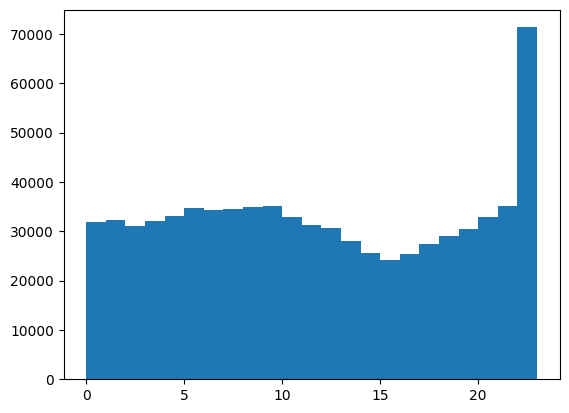

In [127]:
plt.hist(pdf_lst_first_decade[0], bins=23)

In [30]:
# plt.hist(pdf_jja_first_decade[:10])
all_hours_times_first_dec = np.concatenate(pdf_jja_first_decade)

In [32]:
all_hours_times_first_dec

array([ 0,  0,  0, ..., 23, 23, 23])

(array([2.9678004e+08, 1.9785336e+08, 1.9785336e+08, 2.9678004e+08,
        1.9785336e+08, 1.9785336e+08, 2.9678004e+08, 1.9785336e+08,
        1.9785336e+08, 2.9678004e+08]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <BarContainer object of 10 artists>)

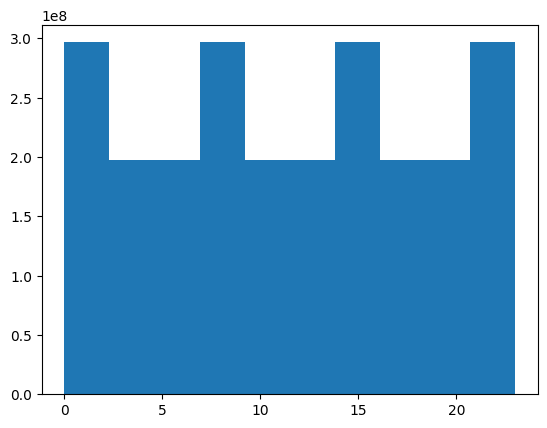

In [31]:
plt.hist(all_hours_times_first_dec)

### Last Decade

### 2019-2023

In [17]:
pdf_jja_last_decade_five_yrs = []

for file in jja_path[120:]:
    data  = xr.open_dataset(file)
    for hour in range(24):
        hourly_data = data['tp'][hour::24].data
        hourly_thresh = thresh_jja.thresh[hour].data
        data['tp'][hour::24] = R99pa1hr(hourly_data, hourly_thresh)
    pdf_jja_last_decade_five_yrs.append(get_lst_times(data))

### 2009-2023

In [18]:
pdf_jja_last_decade_fift_yrs = []

for file in jja_path[90:]:
    data  = xr.open_dataset(file)
    for hour in range(24):
        hourly_data = data['tp'][hour::24].data
        hourly_thresh = thresh_jja.thresh[hour].data
        data['tp'][hour::24] = R99pa1hr(hourly_data, hourly_thresh)
    pdf_jja_last_decade_fift_yrs.append(get_lst_times(data))

In [128]:
all_hours_times_first_dec = np.concatenate(pdf_lst_first_decade)
all_hours_times_last_dec_five_yrs = np.concatenate(pdf_jja_last_decade_five_yrs)
all_hours_times_last_dec_fift_yrs = np.concatenate(pdf_jja_last_decade_fift_yrs)

### Plot Histogram

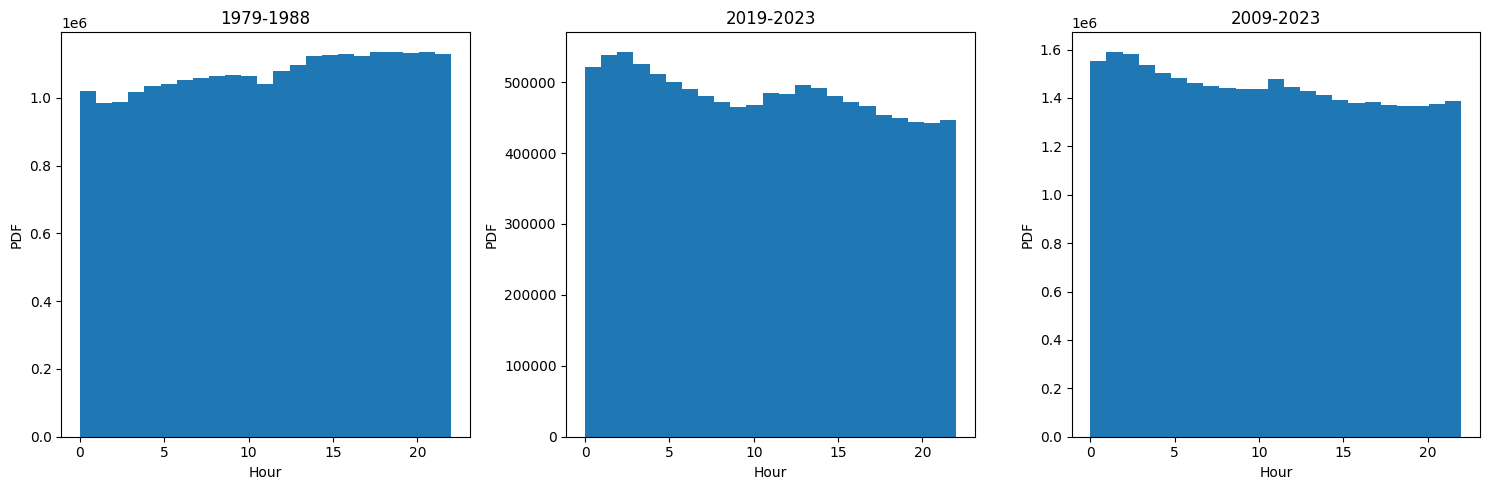

In [130]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first histogram
axs[0].hist(all_hours_times_first_dec[all_hours_times_first_dec<23] ,bins=23) ## 1979-1988
axs[0].set_title('1979-1988')
axs[0].set_xlabel('Hour')
axs[0].set_ylabel('PDF')
# axs[0].set_ylim(0, 4)


# Plot the second histogram
axs[1].hist(all_hours_times_last_dec_five_yrs[all_hours_times_last_dec_five_yrs<23],bins=23) ## 2019-2023
axs[1].set_title('2019-2023')
axs[1].set_xlabel('Hour')
axs[1].set_ylabel('PDF')
# axs[1].set_ylim(0, 4)


# Plot the third histogram
axs[2].hist(all_hours_times_last_dec_fift_yrs[all_hours_times_last_dec_fift_yrs<23],bins=23) ## 2009-2023
axs[2].set_title('2009-2023')
axs[2].set_xlabel('Hour')
axs[2].set_ylabel('PDF')
# axs[2].set_ylim(0, 4)

# Adjust layout to prevent overlap

plt.tight_layout()# Show the plots
plt.show()

### MAM

In [40]:
thresh_mam = xr.open_dataset('R99pa1hr/hours_wise_thresh/MAM_thresh.nc')

In [42]:
mam_path = []
for year in range(1979, 2024):
    for month in range(3,6):
        mam_path.append(f"data_local_solar_time/Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")

### First Decade --> 1979 - 1988

In [45]:
pdf_mam_first_decade = []

for file in mam_path[:30]:
    data  = xr.open_dataset(file)
    for hour in range(24):
        hourly_data = data['tp'][hour::24].data
        hourly_thresh = thresh_mam.thresh[hour].data
        data['tp'][hour::24] = R99pa1hr(hourly_data, hourly_thresh)
    pdf_mam_first_decade.append(get_lst_times(data))

### Last Decade

### 2019-2023

In [46]:
pdf_mam_last_decade_five_yrs = []

for file in mam_path[120:]:
    data  = xr.open_dataset(file)
    for hour in range(24):
        hourly_data = data['tp'][hour::24].data
        hourly_thresh = thresh_mam.thresh[hour].data
        data['tp'][hour::24] = R99pa1hr(hourly_data, hourly_thresh)
    pdf_mam_last_decade_five_yrs.append(get_lst_times(data))

### 2009-2023

In [47]:
pdf_mam_last_decade_fift_yrs = []

for file in mam_path[90:]:
    data  = xr.open_dataset(file)
    for hour in range(24):
        hourly_data = data['tp'][hour::24].data
        hourly_thresh = thresh_mam.thresh[hour].data
        data['tp'][hour::24] = R99pa1hr(hourly_data, hourly_thresh)
    pdf_mam_last_decade_fift_yrs.append(get_lst_times(data))

In [53]:
all_hours_times_first_dec = np.concatenate(pdf_mam_first_decade)
all_hours_times_last_dec_five_yrs = np.concatenate(pdf_mam_last_decade_five_yrs)
all_hours_times_last_dec_fift_yrs = np.concatenate(pdf_mam_last_decade_fift_yrs)

### Plot Histogram

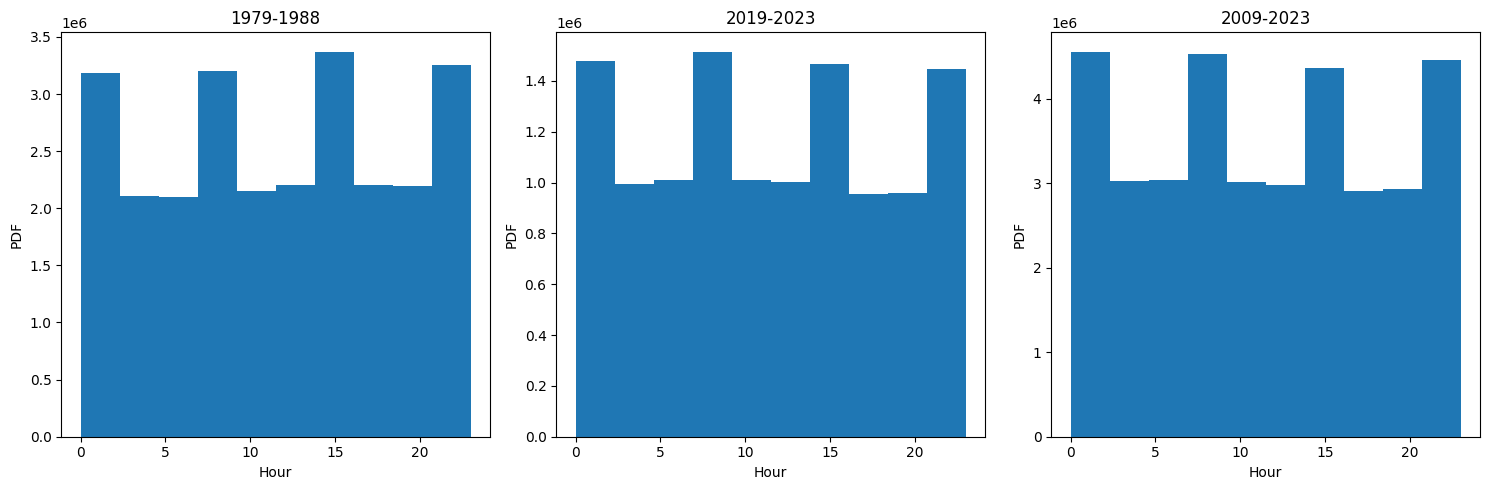

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first histogram
axs[0].hist(all_hours_times_first_dec)
axs[0].set_title('1979-1988')
axs[0].set_xlabel('Hour')
axs[0].set_ylabel('PDF')
# axs[0].set_ylim(0, 4)


# Plot the second histogram
axs[1].hist(all_hours_times_last_dec_five_yrs)
axs[1].set_title('2019-2023')
axs[1].set_xlabel('Hour')
axs[1].set_ylabel('PDF')
# axs[1].set_ylim(0, 4)


# Plot the third histogram
axs[2].hist(all_hours_times_last_dec_fift_yrs)
axs[2].set_title('2009-2023')
axs[2].set_xlabel('Hour')
axs[2].set_ylabel('PDF')
# axs[2].set_ylim(0, 4)

# Adjust layout to prevent overlap

plt.tight_layout()# Show the plots
plt.show()

## SON

In [55]:
thresh_son = xr.open_dataset('R99pa1hr/hours_wise_thresh/SON_thresh.nc')

In [56]:
son_path = []
for year in range(1979, 2024):
    for month in range(9,12):
        son_path.append(f"data_local_solar_time/Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")

### First Decade --> 1979 - 1988

In [58]:
pdf_son_first_decade = []

for file in son_path[:30]:
    data  = xr.open_dataset(file)
    for hour in range(24):
        hourly_data = data['tp'][hour::24].data
        hourly_thresh = thresh_son.thresh[hour].data
        data['tp'][hour::24] = R99pa1hr(hourly_data, hourly_thresh)
    pdf_son_first_decade.append(get_lst_times(data))

### Last Decade

### 2019-2023

In [59]:
pdf_son_last_decade_five_yrs = []

for file in son_path[120:]:
    data  = xr.open_dataset(file)
    for hour in range(24):
        hourly_data = data['tp'][hour::24].data
        hourly_thresh = thresh_son.thresh[hour].data
        data['tp'][hour::24] = R99pa1hr(hourly_data, hourly_thresh)
    pdf_son_last_decade_five_yrs.append(get_lst_times(data))


### 2009-2023

In [60]:
pdf_son_last_decade_fift_yrs = []

for file in son_path[90:]:
    data  = xr.open_dataset(file)
    for hour in range(24):
        hourly_data = data['tp'][hour::24].data
        hourly_thresh = thresh_son.thresh[hour].data
        data['tp'][hour::24] = R99pa1hr(hourly_data, hourly_thresh)
    pdf_son_last_decade_fift_yrs.append(get_lst_times(data))

In [61]:
all_hours_times_first_dec = np.concatenate(pdf_son_first_decade)
all_hours_times_last_dec_five_yrs = np.concatenate(pdf_son_last_decade_five_yrs)
all_hours_times_last_dec_fift_yrs = np.concatenate(pdf_son_last_decade_fift_yrs)

### Plot Histogram

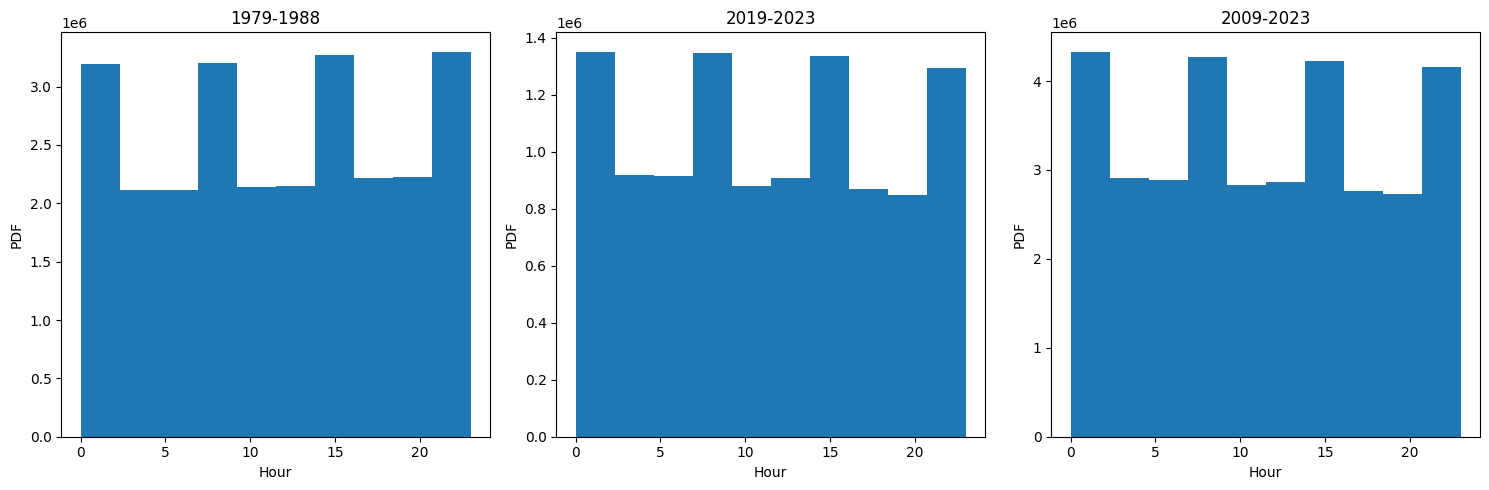

In [62]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first histogram
axs[0].hist(all_hours_times_first_dec)
axs[0].set_title('1979-1988')
axs[0].set_xlabel('Hour')
axs[0].set_ylabel('PDF')
# axs[0].set_ylim(0, 4)


# Plot the second histogram
axs[1].hist(all_hours_times_last_dec_five_yrs)
axs[1].set_title('2019-2023')
axs[1].set_xlabel('Hour')
axs[1].set_ylabel('PDF')
# axs[1].set_ylim(0, 4)


# Plot the third histogram
axs[2].hist(all_hours_times_last_dec_fift_yrs)
axs[2].set_title('2009-2023')
axs[2].set_xlabel('Hour')
axs[2].set_ylabel('PDF')
# axs[2].set_ylim(0, 4)

# Adjust layout to prevent overlap

plt.tight_layout()# Show the plots
plt.show()

## DJF

In [63]:
thresh_djf = xr.open_dataset('R99pa1hr/hours_wise_thresh/DJF_thresh.nc')

In [64]:
djf_path = []
for year in range(1979, 2024):
    djf_path.append(f"Hourly_Total_Precipitation_T_{str(12).zfill(2)}{year-1}.nc")
    for month in range(1,3):
        djf_path.append(f"Hourly_Total_Precipitation_T_{str(month).zfill(2)}{year}.nc")

### First Decade --> 1979 - 1988

In [65]:
pdf_djf_first_decade = []

for file in djf_path[:30]:
    data  = xr.open_dataset(file)
    for hour in range(24):
        hourly_data = data['tp'][hour::24].data
        hourly_thresh = thresh_djf.thresh[hour].data
        data['tp'][hour::24] = R99pa1hr(hourly_data, hourly_thresh)
    pdf_djf_first_decade.append(get_lst_times(data))

KeyError: "No variable named 'LST_Time'. Variables on the dataset include ['tp', 'time', 'longitude', 'latitude']"

## Last Decade

### 2019-2023

In [ ]:
pdf_djf_last_decade_five_yrs = []

for file in djf_path[120:]:
    data  = xr.open_dataset(file)
    for hour in range(24):
        hourly_data = data['tp'][hour::24].data
        hourly_thresh = thresh_djf.thresh[hour].data
        data['tp'][hour::24] = R99pa1hr(hourly_data, hourly_thresh)
    pdf_djf_last_decade_five_yrs.append(get_lst_times(data))

### 2009-2023

In [ ]:
pdf_djf_last_decade_fift_yrs = []

for file in djf_path[90:]:
    data  = xr.open_dataset(file)
    for hour in range(24):
        hourly_data = data['tp'][hour::24].data
        hourly_thresh = thresh_djf.thresh[hour].data
        data['tp'][hour::24] = R99pa1hr(hourly_data, hourly_thresh)
    pdf_djf_last_decade_fift_yrs.append(get_lst_times(data))

In [ ]:
all_hours_times_first_dec = np.concatenate(pdf_djf_first_decade)
all_hours_times_last_dec_five_yrs = np.concatenate(pdf_djf_last_decade_five_yrs)
all_hours_times_last_dec_fift_yrs = np.concatenate(pdf_djf_last_decade_fift_yrs)

## Plot Histogram

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot the first histogram
axs[0].hist(all_hours_times_first_dec)
axs[0].set_title('1979-1988')
axs[0].set_xlabel('Hour')
axs[0].set_ylabel('PDF')
# axs[0].set_ylim(0, 4)


# Plot the second histogram
axs[1].hist(all_hours_times_last_dec_five_yrs)
axs[1].set_title('2019-2023')
axs[1].set_xlabel('Hour')
axs[1].set_ylabel('PDF')
# axs[1].set_ylim(0, 4)


# Plot the third histogram
axs[2].hist(all_hours_times_last_dec_fift_yrs)
axs[2].set_title('2009-2023')
axs[2].set_xlabel('Hour')
axs[2].set_ylabel('PDF')
# axs[2].set_ylim(0, 4)

# Adjust layout to prevent overlap

plt.tight_layout()# Show the plots
plt.show()

In [180]:
data = xr.open_mfdataset(jja_path)

In [185]:
data.tp[:,100,200]

<xarray.DataArray 'tp' (time: 99360)> Size: 795kB
dask.array<getitem, shape=(99360,), dtype=float64, chunksize=(744,), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 795kB 1979-06-01 ... 2023-08-31T23:00:00
    longitude  float32 4B -105.0
    latitude   float32 4B 40.0

In [7]:
# import matplotlib.pyplot as plt
# tmp = ds_first_dec.tp[:,100,200]
# utc_hour = tmp.time.dt.hour[~np.isnan(tmp)]
# plt.hist(utc_hour)